# 0) Import packages

In [3]:
# Import packages
import random 
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy as sp    # scientific computations (slower than numpy, but with broader functionalities)

# 1) Introduction

The goal of today's class is the implementation of the PageRank algorithm, the exploration of its possible uses, and its interpretation.

The class will follow closely the one from week 3. The main difference is that, instead of using other centralities, we will be using PageRank.

The structure of the following analyses can be used as an inspiration for the project. However, some passages must be added on your own. Please refer to the next section for this week's guided list of tasks for the project.

# 2) Project (week 5)

1) Write a function to compute the PageRank of the nodes in a graph (you are not allowed to use built-in functions from NetworkX).

2) Run it on your graph using α = 0.15, save the total number of iterations, and check that your function returns the same results (in terms of the scores) as the built-in function from NetworkX.

3) Identify the node with the highest PageRank, compare it with the one you got from week 3, and give an interpretation to the possible difference.

4) Provide the cumulative distribution, compare it with the one you got from week 3, and comment the results. 

5) Optional: Re-run the PageRank using α = 0.5, save the total number of iterations, compare with the results (in terms of both the number of iterations and the cumulative distribution) obtained for α = 0.15, and comment.

Hint: treat weighted graphs as unweighted & links in undirected graphs as doubly directed (each undirected link becomes a directed link in both directions).
Additionally, make sure you run the PageRank algorithm on a connected graph.

# 3) Example graph

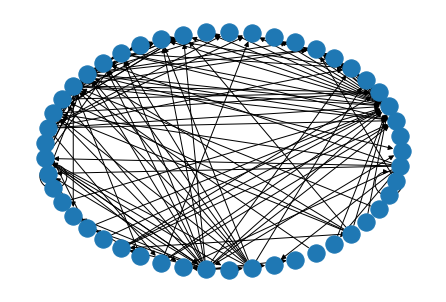

In [4]:
# Code from week 3
sna_advice = [('Venel', 'Giubilei'), ('Beltrame', 'Cadura'), ('Beltrame', 'Cardile'), ('Beltrame', 'Lischi'), ('Beltrame', 'Mohn'), ('Beltrame', 'Spadaccia'), ('Cadura', 'Beltrame'), ('Cadura', 'Bresolin'), ('Cadura', 'Cardile'), ('Cadura', 'Carucci'), ('Cadura', 'El Arrag'), ('Cadura', 'Giubilei'), ('Cadura', 'Hindawi'), ('Cadura', 'Mainetti'), ('Cadura', 'Mimun'), ('Cadura', 'Mohn'), ('Cadura', 'Nota'), ('Cadura', 'Serandrei'), ('Cadura', 'Spadaccia'), ('Cadura', 'Venel'), ('Mohn', 'Beltrame'), ('Mohn', 'Bresolin'), ('Mohn', 'Cadura'), ('Mohn', 'Cardile'), ('Mohn', 'Serandrei'), ('Stanziola', 'Capo'), ('Stanziola', 'Policastro'), ('Capo', 'Beltrame'), ('Capo', 'Cadura'), ('Capo', 'Giannandrea'), ('Capo', 'Girardi'), ('Capo', 'Mohn'), ('Capo', 'Nota'), ('Capo', 'Serandrei'), ('Policastro', 'Girardi'), ('Nota', 'Di Mario'), ('Nota', 'Di Segni'), ('Nota', 'Giannandrea'), ('Di Mario', 'Cardile'), ('Di Segni', 'Cardile'), ('Di Segni', 'Nota'), ('Giannandrea', 'Beltrame'), ('Giannandrea', 'Bresolin'), ('Giannandrea', 'Cadura'), ('Giannandrea', 'Capo'), ('Giannandrea', 'Carucci'), ('Giannandrea', 'Damasco'), ('Giannandrea', 'De Leo'), ('Giannandrea', 'Dospinescu'), ('Giannandrea', 'Formiconi'), ('Giannandrea', 'Mainetti'), ('Giannandrea', 'Nota'), ('Giannandrea', 'Policastro'), ('Giannandrea', 'Venel'), ('Salem', 'Salem'), ('Shkreli', 'Cadura'), ('Girardi', 'Beltrame'), ('Girardi', 'Bresolin'), ('Girardi', 'Cadura'), ('Girardi', 'Cardile'), ('Girardi', 'De Leo'), ('Girardi', 'Pazzaglia'), ('Girardi', 'Policastro'), ('Girardi', 'Serandrei'), ('Wu', 'Cadura'), ('Wu', 'De Leo'), ('Giordano', 'Cadura'), ('Magri', 'Beltrame'), ('Magri', 'Cadura'), ('Magri', 'Cardile'), ('Aprea', 'Girardi'), ('Aprea', 'Pazzaglia'), ('Damasco', 'Beltrame'), ('Damasco', 'Cadura'), ('Damasco', 'Girardi'), ('Damasco', 'Hindawi'), ('Damasco', 'Mainetti'), ('Damasco', 'Mohn'), ('Damasco', 'Mosca'), ('Damasco', 'Policastro'), ('Dospinescu', 'Capo'), ('Dospinescu', 'Di Segni'), ('Dospinescu', 'Ferraresi'), ('Dospinescu', 'Filangieri'), ('Dospinescu', 'Giannandrea'), ('Dospinescu', 'Girardi'), ('Dospinescu', 'Pacielli'), ('Dospinescu', 'Pazzaglia'), ('Filangieri', 'Beltrame'), ('Filangieri', 'Cadura'), ('Filangieri', 'Capo'), ('Filangieri', 'Di Mario'), ('Filangieri', 'Di Segni'), ('Filangieri', 'Dospinescu'), ('Filangieri', 'Ferraresi'), ('Filangieri', 'Formiconi'), ('Filangieri', 'Giannandrea'), ('Filangieri', 'Macis'), ('Filangieri', 'Magri'), ('Filangieri', 'Mohn'), ('Filangieri', 'Natoli'), ('Filangieri', 'Nota'), ('Filangieri', 'Pazzaglia'), ('Filangieri', 'Policastro'), ('Filangieri', 'Serandrei'), ('Filangieri', 'Trimarchi'), ('Filangieri', 'Venel'), ('Filangieri', 'Wu'), ('Macis', 'Capo'), ('Macis', 'Di Segni'), ('Macis', 'Dospinescu'), ('Macis', 'Giannandrea'), ('Macis', 'Girardi'), ('Macis', 'Lischi'), ('Macis', 'Policastro'), ('Macis', 'Serandrei'), ('Milano', 'Girardi'), ('Ben Belhassen', 'Cadura'), ('De Marinis', 'Cadura'), ('De Marinis', 'Di Mario'), ('De Marinis', 'Di Segni'), ('De Marinis', 'Giannandrea'), ('De Marinis', 'Magri'), ('De Marinis', 'Nota'), ('Martini', 'Cadura'), ('Stella', 'Girardi'), ('Teimourpour', 'Teimourpour'), ('Mosca', 'Beltrame'), ('Mosca', 'Cadura'), ('Mosca', 'Hindawi'), ('Tiberi', 'Bresolin'), ('Fornari', 'Beltrame'), ('Fornari', 'Ben Belhassen'), ('Fornari', 'Di Segni'), ('Fornari', 'Dospinescu'), ('Fornari', 'Ferraresi'), ('Fornari', 'Formiconi'), ('Fornari', 'Natoli'), ('Fornari', 'Policastro')]

G_SNA = nx.DiGraph()
G_SNA.add_edges_from(sna_advice)
N_SNA = G_SNA.number_of_nodes()

nx.draw_circular(G_SNA)   # alternatives can be found at https://networkx.org/documentation/stable/reference/drawing.html

list_of_names = ['Venel', 'Giubilei', 'Beltrame', 'Cadura', 'Cardile', 'Lischi', 'Mohn', 'Spadaccia', 'Bresolin', 'Carucci', 'El Arrag', 'Hindawi', 'Mainetti', 'Mimun', 'Nota', 'Serandrei', 'Stanziola', 'Capo', 'Policastro', 'Giannandrea', 'Girardi', 'Di Mario', 'Di Segni', 'Damasco', 'De Leo', 'Dospinescu', 'Formiconi', 'Salem', 'Shkreli', 'Pazzaglia', 'Wu', 'Giordano', 'Magri', 'Aprea', 'Mosca', 'Ferraresi', 'Filangieri', 'Pacielli', 'Macis', 'Natoli', 'Trimarchi', 'Milano', 'Ben Belhassen', 'De Marinis', 'Martini', 'Stella', 'Teimourpour', 'Tiberi', 'Fornari']


# 4) PageRank

### PageRank of all nodes using the built-in function from NetworkX

In [5]:
# PageRank scores computation
pr = nx.pagerank(G_SNA)   # returns a dictionary
print(pr)

# Separately save the values of the dictionary
pr_values = pr.values()

{'Venel': 0.01577796384312513, 'Giubilei': 0.027181691941974118, 'Beltrame': 0.03600973912949792, 'Cadura': 0.07437166732103348, 'Cardile': 0.058828059045536576, 'Lischi': 0.01640785135501735, 'Mohn': 0.023635487924961833, 'Spadaccia': 0.019891912028648137, 'Bresolin': 0.033079689868177733, 'Carucci': 0.015324679429920336, 'El Arrag': 0.013770092052780718, 'Hindawi': 0.0178661809467532, 'Mainetti': 0.01647317575632396, 'Mimun': 0.013770092052780718, 'Nota': 0.028843296761851725, 'Serandrei': 0.02728513086499254, 'Stanziola': 0.009254552413545242, 'Capo': 0.017637904528507768, 'Policastro': 0.02422932162230454, 'Giannandrea': 0.023775423239856416, 'Girardi': 0.05524882480668165, 'Di Mario': 0.019191412839313207, 'Di Segni': 0.022616944353346186, 'Damasco': 0.01080913979068486, 'De Leo': 0.020805396428534968, 'Dospinescu': 0.01327721943968939, 'Formiconi': 0.0122457404740847, 'Salem': 0.06163564305517184, 'Shkreli': 0.009254552413545242, 'Pazzaglia': 0.020922178961194804, 'Wu': 0.0097078

An important optional argument of the function nx.pagerank( ) is alpha. By default, it is equal to 0.85. But be aware that in this case alpha is the dumping factor!

### Who is the most central using PageRank?

In [6]:
# Node with highest value of PageRank
value_max = max(pr_values) 
index_max = list(pr_values).index(value_max) 
name_max = list_of_names[index_max] 
print('And the winner is: ' + name_max + '!')

And the winner is: Cadura!


Let's compare the results with those obtained using in-degree centrality.

In [7]:
# Code from week 3
def indegs_fun(G, j):
    A = nx.adjacency_matrix(G)
    N = G.number_of_nodes()
    count = 0
    for i in range(N):
        count = count + A[i, j]
    Result = count
    return Result

data_centralities=[]
for i in range(N_SNA):
    data_centralities.append(indegs_fun(G_SNA,i))
    
value_max = max(data_centralities) 
index_max = data_centralities.index(value_max) 
name_max = list_of_names[index_max] 
print('And the winner is: ' + name_max + '!')

And the winner is: Cadura!


So, apparently, nothing changed. Let's investigate further plotting all the scores.

### Plot the PageRank scores

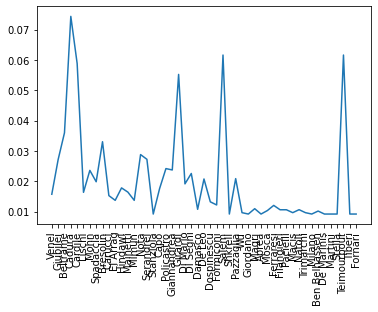

In [8]:
# Plot the PageRank scores
plt.xticks(rotation = 90)
plt.plot(list_of_names, pr.values())

### Plot results from week 3 (in-degree centrality)

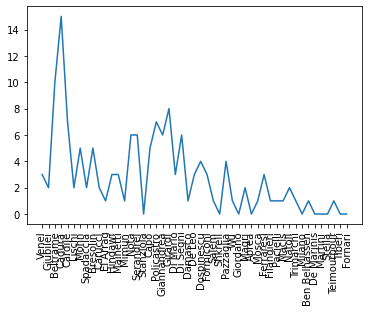

In [9]:
# Plot the in-degree centrality scores
plt.xticks(rotation = 90)
plt.plot(list_of_names, data_centralities)

Results are quite different for three nodes! Namely: Girardi, Salem, and Teimourpour.

Why so? Probably because they receive links from other "important" nodes (or because they are disconnected from the rest of the graph).

In [10]:
# In-coming edges for Girardi, Salem, Teimourpour
print(G_SNA.in_edges(['Girardi', 'Salem', 'Teimourpour']))

[('Capo', 'Girardi'), ('Policastro', 'Girardi'), ('Aprea', 'Girardi'), ('Damasco', 'Girardi'), ('Dospinescu', 'Girardi'), ('Macis', 'Girardi'), ('Milano', 'Girardi'), ('Stella', 'Girardi'), ('Salem', 'Salem'), ('Teimourpour', 'Teimourpour')]


In [11]:
# Out-going edges for Girardi, Salem, Teimourpour
print(G_SNA.out_edges(['Girardi', 'Salem', 'Teimourpour']))

[('Girardi', 'Beltrame'), ('Girardi', 'Bresolin'), ('Girardi', 'Cadura'), ('Girardi', 'Cardile'), ('Girardi', 'De Leo'), ('Girardi', 'Pazzaglia'), ('Girardi', 'Policastro'), ('Girardi', 'Serandrei'), ('Salem', 'Salem'), ('Teimourpour', 'Teimourpour')]


Salem and Teimourpour are actually disconnected from the rest of the graph. Girardi does not receive links from other nodes with high PageRank, so the reason for its value should be further investigated.

### Cumulative distribution

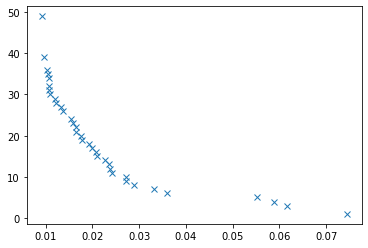

In [12]:
# Cumulative distribution for the PageRank

cdf_x = []  # list of x-axis
cdf_y = []  # list of y-axis

pr_values_copy = list(pr_values).copy() 
N = len(pr_values_copy)
N_temp = N 

while pr_values_copy:
    current_min = min(pr_values_copy) 
    current_num = pr_values_copy.count(current_min) 
    cdf_x.append(current_min) 
    cdf_y.append(N_temp)
    N_temp = N_temp - current_num 
    for n in range(current_num):  
        pr_values_copy.remove(current_min) 
        
plt.plot(cdf_x,cdf_y,"x")

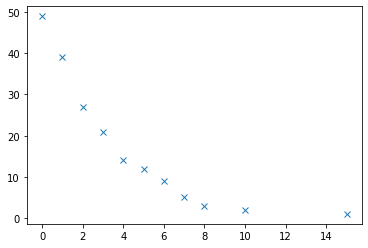

In [13]:
# Cumulative distribution for the in-degree centrality

cdf_x = []  
cdf_y = []  

data_centralities_copy = data_centralities.copy() 
N = len(data_centralities_copy)
N_temp = N 

while data_centralities_copy:
    current_min = min(data_centralities_copy) 
    current_num = data_centralities_copy.count(current_min) 
    cdf_x.append(current_min)
    cdf_y.append(N_temp) 
    N_temp = N_temp - current_num 
    for n in range(current_num):  
        data_centralities_copy.remove(current_min) 
        
plt.plot(cdf_x, cdf_y, "x")

Except for variations due to the limited size of the graph, the two distributions are pretty similar.

We can conclude that we have confirmation of the same phenomenon we have observed for the Web host graph.

Hint for the project: since the comparison you will make is with the centrality measure you picked for week 3, which cannot be the in-degree centrality, you will need a different conclusion. As for the most central node, check whether you get comparable results or not, and in both cases try to give your own interpretation.